In [1]:
import random
import numpy as np
import pandas as pd
from scipy.stats import beta, norm
from statistics import mode
import matplotlib.pyplot as plt

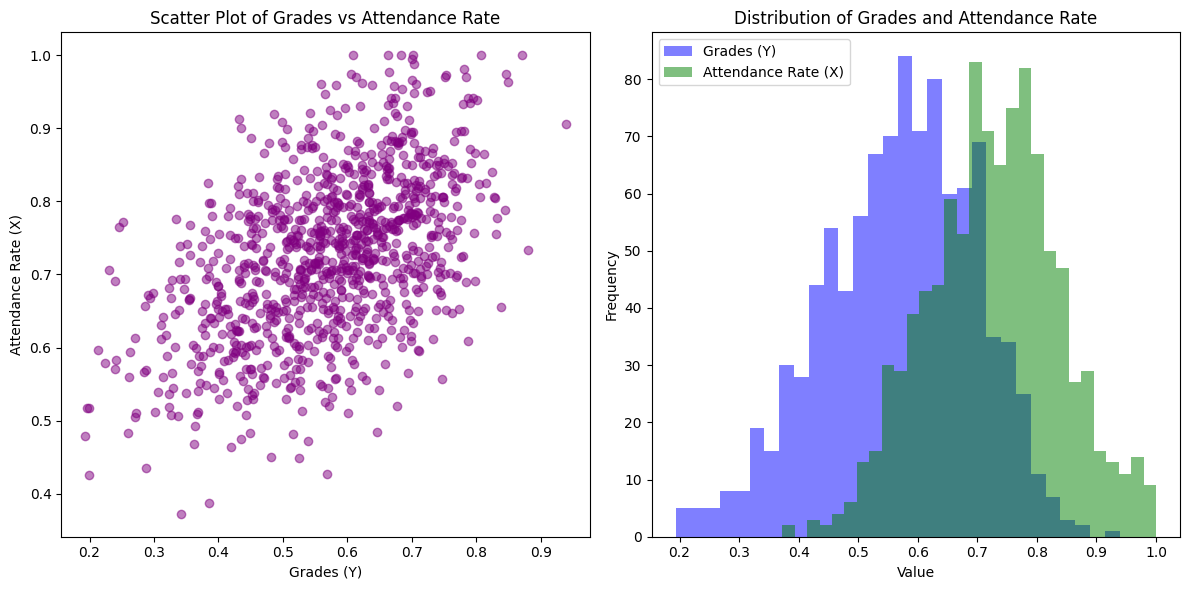

In [2]:
# Generate grades (Y) from a beta distribution
x = np.linspace(0, 1, 1000)
grades = beta.rvs(8, 6, size=1000)

# Generate attendance rate (X) conditional on grades
attendance = np.clip([norm.rvs(loc=0.5 + 0.4 * grade, scale=0.1) for grade in grades], 0.3, 1)


# Scatter plot of Grades vs. Attendance Rate, to show the relationship
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(grades, attendance, alpha=0.5, color='purple')
plt.xlabel("Grades (Y)")
plt.ylabel("Attendance Rate (X)")
plt.title("Scatter Plot of Grades vs Attendance Rate")

# Show distribution
plt.subplot(1, 2, 2)
plt.hist(grades, bins=30, alpha=0.5, label="Grades (Y)", color='blue')
plt.hist(attendance, bins=30, alpha=0.5, label="Attendance Rate (X)", color='green')
plt.xlabel("Value")
plt.ylabel("Frequency")
plt.title("Distribution of Grades and Attendance Rate")
plt.legend()

plt.tight_layout()
plt.show()

In [3]:
# Simulate the actual data being used in the article
np.random.seed(seed=0)
grades = beta.rvs(8, 3, size=800)
attendance = np.clip([norm.rvs(loc=0.5 + 0.4 * grade, scale=0.1) for grade in grades], 0.3, 1)
df = pd.DataFrame.from_dict({'Grade': grades, 'Attendance': attendance})

# Generate the MCAR mechanism
mcar = df.copy()
mcar['Missing'] = [np.random.choice([1, 0], p=[0.75, 0.25]) for _ in range(0, len(df))]

# Generate the MAR mechanism
mar = df.copy()
mar['Missing'] = [np.random.choice([1, 0], p=[min(1, attendance - 0.25), max(0,1 - attendance + 0.25),]) for attendance in df['Attendance']]

/Users/tomas/.pyenv/versions/3.10.14/envs/missing-data/lib/python3.10/site-packages/scipy/stats/_continuous_distns.py:785: RuntimeWarning: invalid value encountered in sqrt
  sk = 2*(b-a)*np.sqrt(a + b + 1) / (a + b + 2) / np.sqrt(a*b)


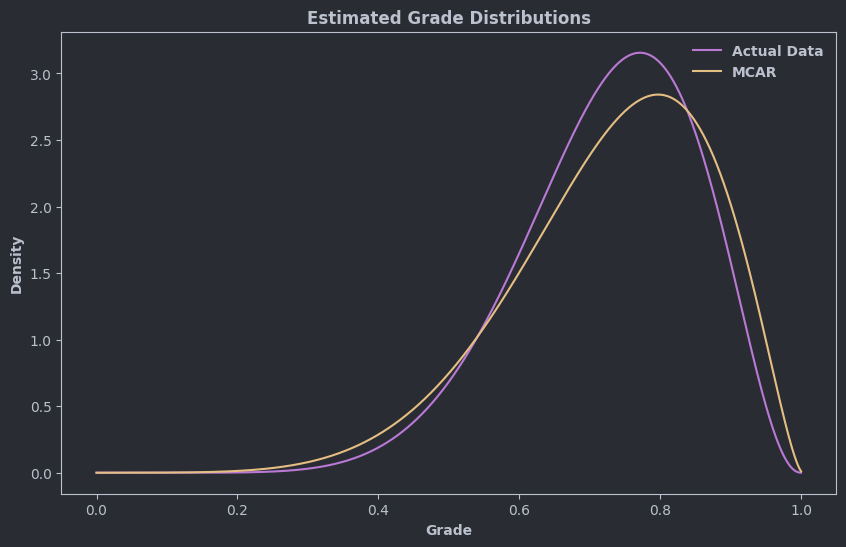

In [4]:
# Estimate the MCAR distribution and variance scaling factor
mcar_miss_rate = len(mcar[mcar['Missing'] == 1]) / len(mcar)
a_mcar, b_mcar, loc_mcar, scale_mcar = beta.fit(mcar[mcar['Missing'] == 1]['Grade'])

# Estimate the MAR distribution and variance scaling factor
mar_miss_rate = len(mar[mar['Missing'] == 1]) / len(mar)
a_mar, b_mar, loc_mar, scale_mar = beta.fit(mar[mar['Missing'] == 1]['Grade'])

# Estimate the actual data distribution and variance scaling factor
a_all, b_all, loc_all, scale_all = beta.fit(grades)


# Set background color for the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#292C33')
ax.set_facecolor('#292C33')

# Plot the distributions
x = np.linspace(0, 1, 10_000)
plt.plot(np.linspace(0, 1, 10_000), beta.pdf(x, a_all, b_all, loc_all, scale_all), color='#B979D5', label='Actual Data')
plt.plot(np.linspace(0, 1, 10_000), beta.pdf(x, a_mcar * mcar_miss_rate, b_mcar * mcar_miss_rate, loc_mcar, scale_mcar), color='#E4BE83', label='MCAR')

# Customize axis lines and text
ax.spines['bottom'].set_color('#BBC1CD')  # Bottom axis color
ax.spines['left'].set_color('#BBC1CD')  # Left axis color
ax.spines['right'].set_color('#BBC1CD')  # Left axis color
ax.spines['top'].set_color('#BBC1CD')  # Left axis color
ax.tick_params(axis='x', colors='#BBC1CD')  # X-axis tick color
ax.tick_params(axis='y', colors='#BBC1CD')  # Y-axis tick color

# Labels and title
plt.xlabel('Grade', color='#BBC1CD', fontweight='bold')
plt.ylabel('Density', color='#BBC1CD', fontweight='bold')
plt.title('Estimated Grade Distributions', color='#BBC1CD', fontweight='bold')

# Add a legend
legend = ax.legend(facecolor='#292C33', framealpha=0, edgecolor='#000000', prop={'weight': 'bold'})

# Change legend text color
for text in legend.get_texts():
    text.set_color('#BBC1CD')  # Set the legend text color to black

plt.savefig('Grade_MCAR_distribution_plot.svg', format='svg', dpi=1200)

plt.show()

[Actual] Mode: 0.75 Median: 0.74 Mean: 0.73 Upper-Lower Mean CI: [0.85, 0.6]
[MCAR] Mode: 0.75 Median: 0.74 Mean: 0.73 Upper-Lower Mean CI: [0.86, 0.6]
[MAR] Mode: 0.71 Median: 0.75 Mean: 0.74 Upper-Lower Mean CI: [0.87, 0.61]


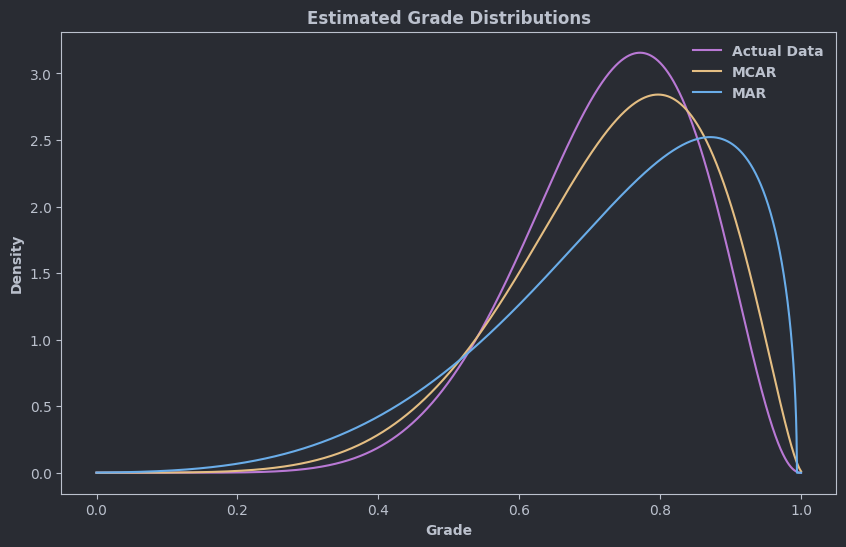

In [5]:
# Estimate the MAR distribution and variance scaling factor
mar_miss_rate = len(mar[mar['Missing'] == 1]) / len(mar)
a_mar, b_mar, loc_mar, scale_mar = beta.fit(mar[mar['Missing'] == 1]['Grade'])

# Set background color for the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#292C33')  # Background color for figure
ax.set_facecolor('#292C33')  # Background color for the plot area

# All Data
real_mode = mode(round(mcar['Grade'],2))
median = np.median(mcar['Grade'])
mean = np.mean(mcar['Grade'])
std = np.std(mcar['Grade'])
plt.plot(np.linspace(0, 1, 10_000), beta.pdf(x, a_all, b_all, loc_all, scale_all), color='#B979D5', label='Actual Data')
print(f"[Actual] Mode: {real_mode} Median: {round(median,2)} Mean: {round(mean,2)} Upper-Lower Mean CI: [{round(mean + std,2)}, {round(mean - std,2)}]")

# MCAR Information and plotting
mcar_mode = mode(round(mcar[mcar['Missing'] == 1]['Grade'], 2))
mcar_median = np.median(mcar[mcar['Missing'] == 1]['Grade'])
mcar_mean = np.mean(mcar[mcar['Missing'] == 1]['Grade'])
mcar_std = np.std(mcar[mcar['Missing'] == 1]['Grade'])
plt.plot(np.linspace(0, 1, 10_000), beta.pdf(x, a_mcar * mcar_miss_rate, b_mcar * mcar_miss_rate, loc_mcar, scale_mcar), color='#E4BE83', label='MCAR')
print(f"[MCAR] Mode: {mcar_mode} Median: {round(mcar_median,2)} Mean: {round(mcar_mean,2)} Upper-Lower Mean CI: [{round(mcar_mean + mcar_std,2)}, {round(mcar_mean - mcar_std,2)}]")

# MAR Information and plotting
mar_mode = mode(round(mar[mar['Missing'] == 1]['Grade'], 2))
mar_median = np.median(mar[mar['Missing'] == 1]['Grade'])
mar_mean = np.mean(mar[mar['Missing'] == 1]['Grade'])
mar_std = np.std(mar[mar['Missing'] == 1]['Grade'])
plt.plot(np.linspace(0, 1, 10_000), beta.pdf(x, a_mar * mar_miss_rate, b_mar * mar_miss_rate, loc_mar, scale_mar), color='#6AADE9', label='MAR')
print(f"[MAR] Mode: {mar_mode} Median: {round(mar_median,2)} Mean: {round(mar_mean,2)} Upper-Lower Mean CI: [{round(mar_mean + mar_std,2)}, {round(mar_mean - mar_std,2)}]")

# Customize axis lines and text
ax.spines['bottom'].set_color('#BBC1CD')  # Bottom axis color
ax.spines['left'].set_color('#BBC1CD')  # Left axis color
ax.spines['right'].set_color('#BBC1CD')  # Left axis color
ax.spines['top'].set_color('#BBC1CD')  # Left axis color
ax.tick_params(axis='x', colors='#BBC1CD')  # X-axis tick color
ax.tick_params(axis='y', colors='#BBC1CD')  # Y-axis tick color

# Labels and title
plt.xlabel('Grade', color='#BBC1CD', fontweight='bold')
plt.ylabel('Density', color='#BBC1CD', fontweight='bold')
plt.title('Estimated Grade Distributions', color='#BBC1CD', fontweight='bold')

# Add a legend
legend = ax.legend(facecolor='#292C33', framealpha=0, edgecolor='#000000', prop={'weight': 'bold'})

# Change legend text color
for text in legend.get_texts():
    text.set_color('#BBC1CD')  # Set the legend text color to black

plt.savefig('Grade_MCAR_and_MAR_distribution_plot.svg', format='svg', dpi=1200)

plt.show()

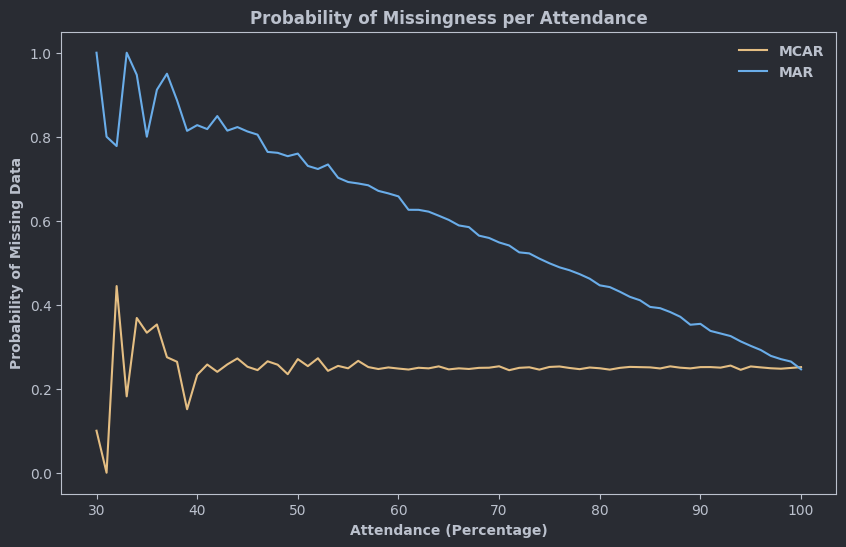

In [6]:
# Simulate a large amount of data with the same mechanism.
# This large amount of data is obtained to get better estimates and less erratic lines on the graphs.
np.random.seed(seed=0)
grades = beta.rvs(8, 3, size=1_000_000)
attendance = np.clip([norm.rvs(loc=0.5 + 0.4 * grade, scale=0.1) for grade in grades], 0.3, 1)
df = pd.DataFrame.from_dict({'Grade': grades, 'Attendance': attendance})

mcar = df.copy()
mcar['Missing'] = [np.random.choice([0, 1], p=[0.75, 0.25]) for _ in range(0, len(df))]

mar = df.copy()
mar['Missing'] = [np.random.choice([0, 1], p=[min(1, attendance - 0.25), max(0,1 - attendance + 0.25),]) for attendance in df['Attendance']]

mcar['Attendance'] = round(mcar['Attendance'], 2) * 100
mcar_missingness = mcar.groupby('Attendance')['Missing'].mean()

mar['Attendance'] = round(mar['Attendance'], 2) * 100
mar_missingness = mar.groupby('Attendance')['Missing'].mean()

# Set background color for the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))
fig.patch.set_facecolor('#292C33')
ax.set_facecolor('#292C33')
plt.plot(mcar_missingness.index, mcar_missingness.values, color='#E4BE83', label='MCAR')
plt.plot(mar_missingness.index, mar_missingness.values, color='#6AADE9', label='MAR')

# Customize axis lines and text
ax.spines['bottom'].set_color('#BBC1CD')  # Bottom axis color
ax.spines['left'].set_color('#BBC1CD')  # Left axis color
ax.spines['right'].set_color('#BBC1CD')  # Left axis color
ax.spines['top'].set_color('#BBC1CD')  # Left axis color
ax.tick_params(axis='x', colors='#BBC1CD')  # X-axis tick color
ax.tick_params(axis='y', colors='#BBC1CD')  # Y-axis tick color

# Labels and title
plt.xlabel('Attendance (Percentage)', color='#BBC1CD', fontweight='bold')
plt.ylabel('Probability of Missing Data', color='#BBC1CD', fontweight='bold')
plt.title('Probability of Missingness per Attendance', color='#BBC1CD', fontweight='bold')

# Add a legend
legend = ax.legend(facecolor='#292C33', framealpha=0, edgecolor='#000000', prop={'weight': 'bold'})

# Change legend text color
for text in legend.get_texts():
    text.set_color('#BBC1CD')  # Set the legend text color to black

plt.savefig('miss_probability_mcar_mar.svg', format='svg', dpi=1200)

plt.show()